In [12]:
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib as mpl
import matplotlib.pyplot as plt

import sys; sys.path.append("..")
from dataset_manipulation import *

In [2]:
processed_path = '../../processed-data/postprocessing/' #/Users/adelezaini/Desktop/master-thesis/processed-data/output/IDEAL-ON_BVOC_20082012.nc
casealias = ['IDEAL-ON', 'IDEAL-OFF', 'REAL-ON', 'REAL-OFF'] #CTRL
date = '20082012'

In [25]:
ds_dict = {}
for case in casealias:
    ds_dict[case] = xr.open_dataset(processed_path+case+'_'+'BVOC_'+date+'.nc')

In [29]:
ds_lnd = xr.open_dataset(processed_path+'REAL-ON_LAND_20082012.nc')
ds_lnd = convert360_180(ds_lnd)

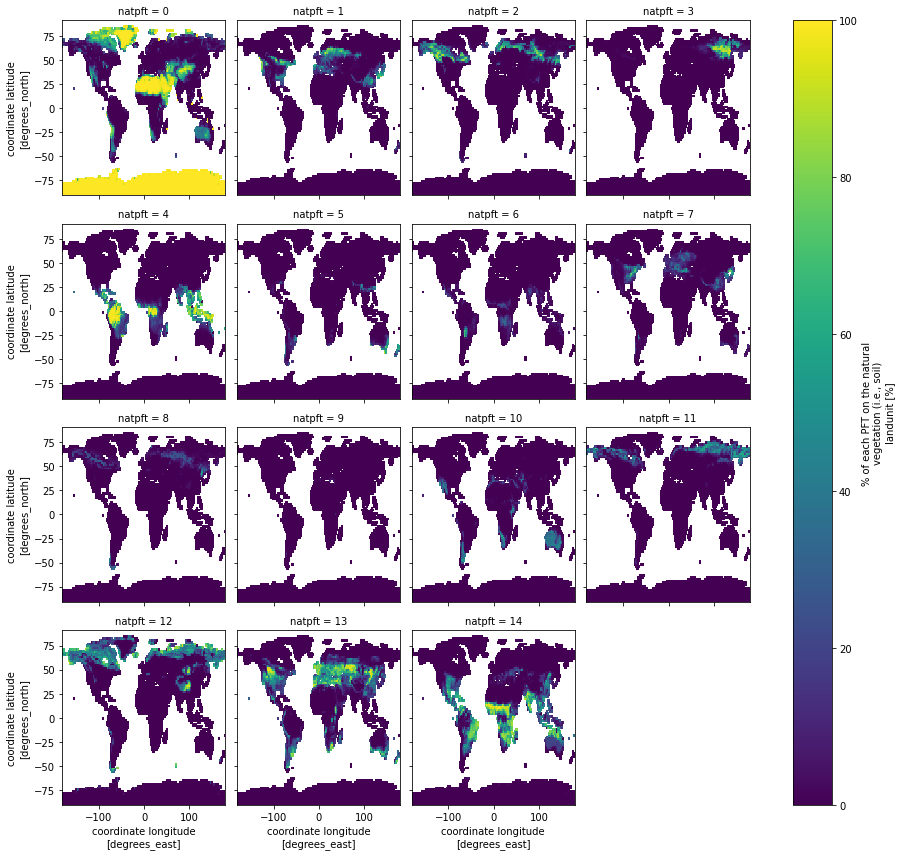

In [30]:
pfts2012 = ds_lnd.PCT_NAT_PFT.isel(time=-1)
pfts2012.plot(col='natpft', col_wrap=4)

In [33]:
fn_in='surfdata_1.9x2.5_hist_78pfts_CMIP6_simyr2000_c190304'
fn = '../../data/surfdatamap/'+fn_in + '.nc'
dset_in = xr.open_dataset(fn)
#Convert Land Surface coord to normal coord
dset_in = convert_lsmcoord(dset_in)
#Convert longitude [0,360] -> [-180,180]
dset_in = convert360_180(dset_in)

# Land fraction based on PFT dataset
lnd_frac=dset_in.LANDFRAC_PFT
# Select PFT: percent plant functional type on the natural veg landunit (% of landunit)
# OBS! variable is centered, related to the ammount of land (full coloured even if )
pfts2000 = dset_in.PCT_NAT_PFT

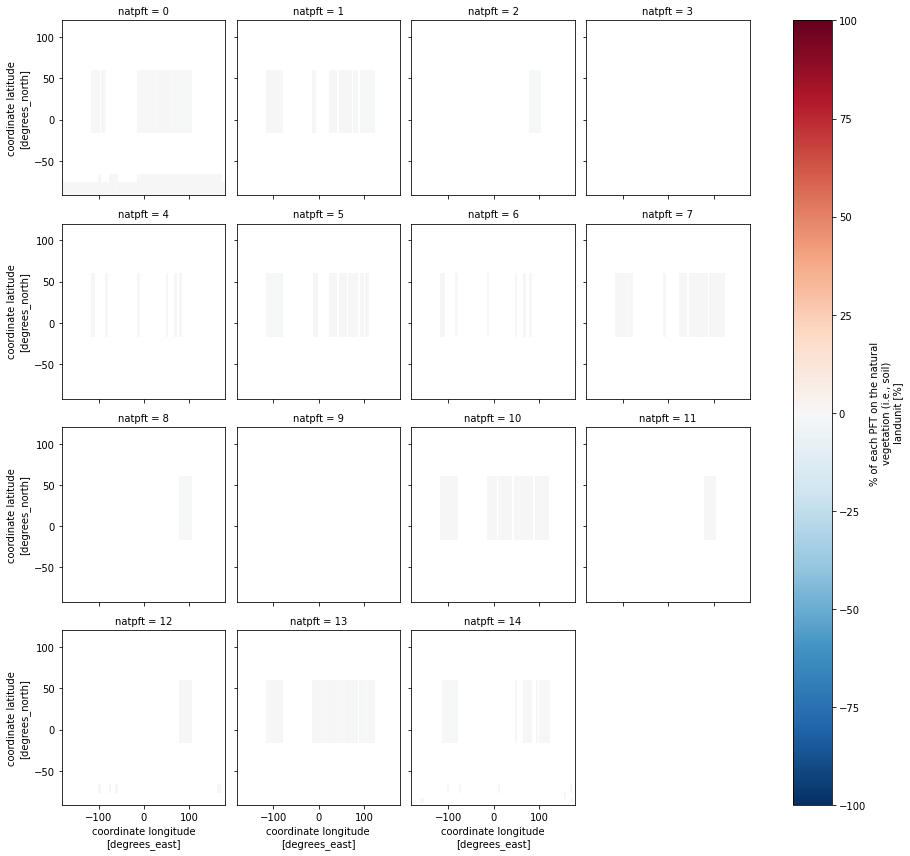

In [34]:
(pfts2012-pfts2000.where(pfts2000>0.)).plot(col='natpft', col_wrap=4, vmax=100)

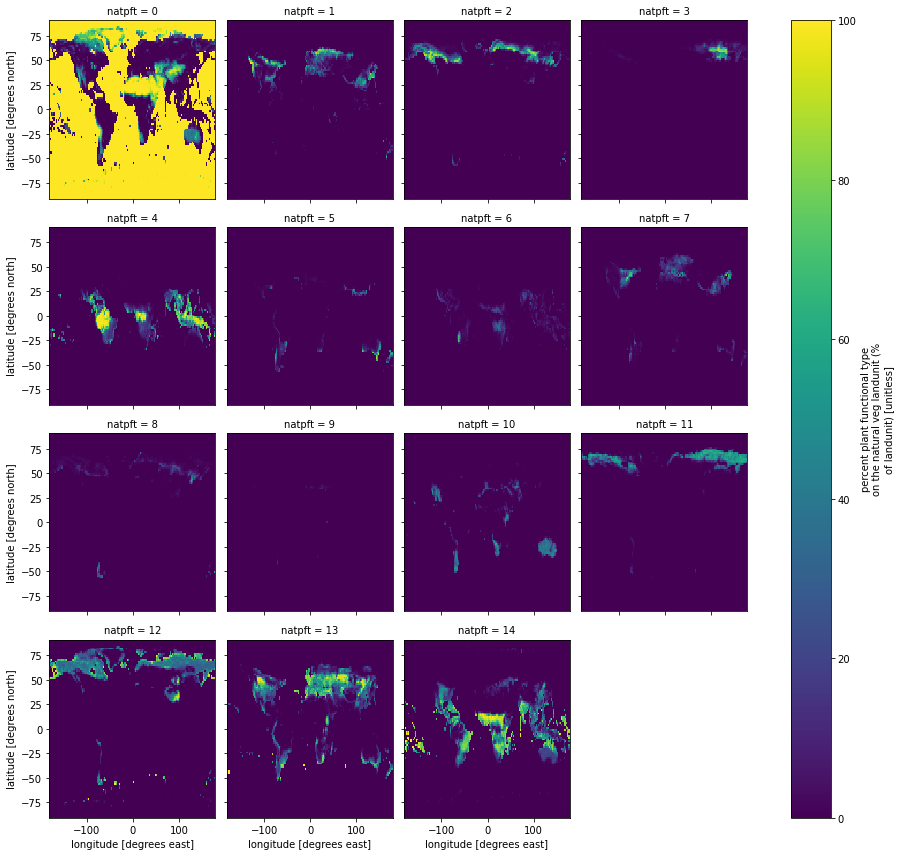

In [18]:
pfts.plot(col='natpft', col_wrap=4)

In [26]:
lnd_frac = ds_dict[casealias[0]].LANDFRAC.isel(time=0)

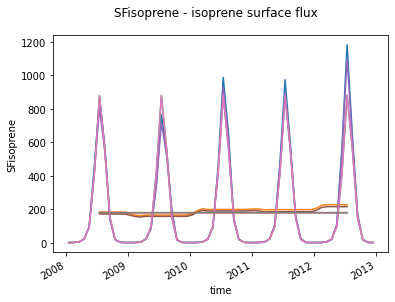

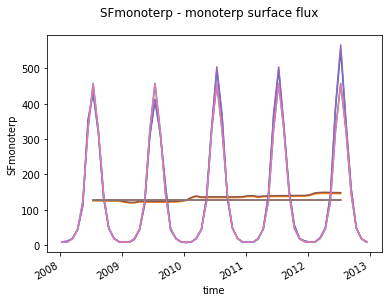

In [27]:
variables = ['SFisoprene', 'SFmonoterp']

for var in variables:
    for case in casealias:
        ds = ds_dict[case]
        ds[var].where(lnd_frac>0.).where(ds.lat>45.).mean('lon').mean('lat').plot()
        ds[var].where(lnd_frac>0.).where(ds.lat>45.).mean('lon').mean('lat').chunk({'time': None}).rolling(time=12, center=True).mean().plot(label = case+var)
    plt.suptitle(var+' - '+ds[var].long_name)
    plt.show()

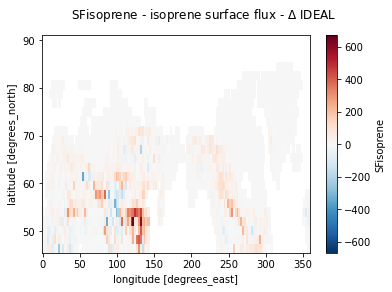

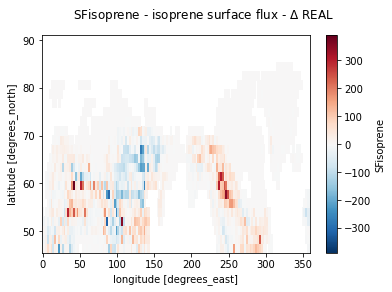

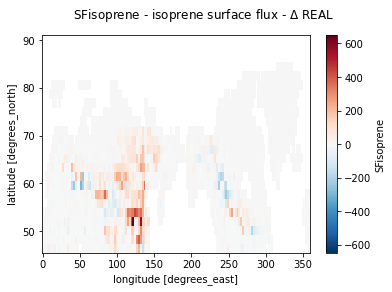

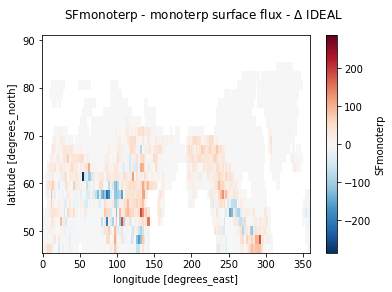

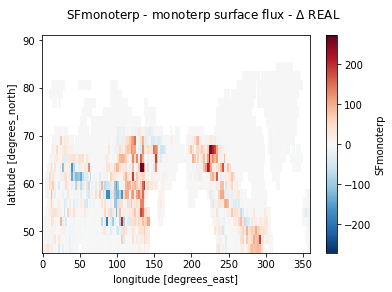

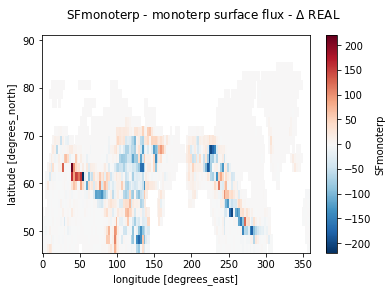

In [34]:
for var in variables:
    ds0 = ds_dict[casealias[0]].where(lnd_frac>0.)
    ds1 = ds_dict[casealias[1]].where(lnd_frac>0.)
    ds2 = ds_dict[casealias[2]].where(lnd_frac>0.)
    ds3 = ds_dict[casealias[3]].where(lnd_frac>0.)
    (ds0[var]-ds1[var]).where(ds.lat>45., drop=True).mean('time').plot()
    plt.suptitle(var+' - '+ds[var].long_name+' - $\Delta$ IDEAL')
    plt.show()
    (ds2[var]-ds3[var]).where(ds.lat>45., drop=True).mean('time').plot()
    plt.suptitle(var+' - '+ds[var].long_name+' - $\Delta$ REAL')
    plt.show()
    
    (ds0[var]-ds2[var]).where(ds.lat>45., drop=True).mean('time').plot()
    plt.suptitle(var+' - '+ds[var].long_name+' - $\Delta$ REAL')
    plt.show()

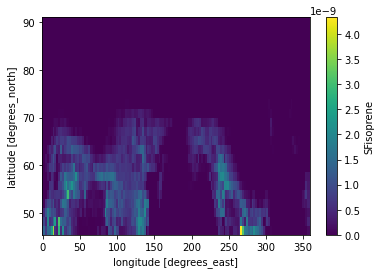

In [4]:
ds['SFisoprene'].where(ds['SFisoprene'].lat>45.).dropna('lat', how='all').sum('time').plot()

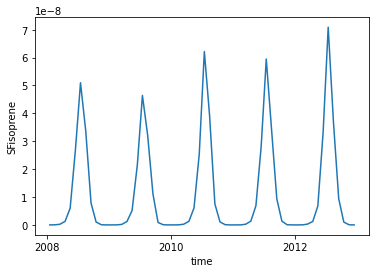

In [6]:
ds['SFisoprene'].where(ds['SFisoprene'].lat>45.).dropna('lat', how='all').sum('lat').sum('lon').plot()

In [5]:
import cartopy

In [6]:

path = '/cluster/home/adelez/nird/archive'
case_name = 'CTRL_2000_sec_nudg_f19_f19'
history_field='h2'
y=2000
input_path = path+'/'+ case_name+'/atm/hist'
print(input_path)

/cluster/home/adelez/nird/archive/CTRL_2000_sec_nudg_f19_f19/atm/hist


In [7]:
f'/{case_name}.cam.{history_field}.{y:04.0f}*.nc'

'/CTRL_2000_sec_nudg_f19_f19.cam.h2.2000*.nc'

In [20]:
ds = xr.open_dataset(processed_path+casealias+'_'+'RADIATIVE_'+date+'.nc')
ds

<xarray.Dataset>
Dimensions:   (time: 60, lat: 96, lon: 144, lev: 32)
Coordinates:
  * lat       (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon       (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lev       (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * time      (time) object 2008-01-15 00:00:00 ... 2012-12-15 00:00:00
Data variables:
    FLNT      (time, lat, lon) float32 ...
    FSNT      (time, lat, lon) float32 ...
    FLNT_DRF  (time, lat, lon) float32 ...
    FLNTCDRF  (time, lat, lon) float32 ...
    FSNTCDRF  (time, lat, lon) float32 ...
    FSNT_DRF  (time, lat, lon) float32 ...
    LHFLX     (time, lat, lon) float32 ...
    OMEGAT    (time, lev, lat, lon) float32 ...
    SHFLX     (time, lat, lon) float32 ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              VEG_SHIFT_IDEAL_2000_sec_nudg_f19_f19
    logname:           adelez
    host:              
    initial_file:      /cluster/shared/noresm/inputdata/atm/cam/inic/fv/cami-...
    topography_file:   /cluster/shared/noresm/inputdata/noresm-only/inputForN...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1